<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" align="left" height=100 width=200>

🚀 [**Kaggle - Marketing Campaign**](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign?select=marketing_campaign.csv) 🚀

# ℹ️ Readme

- The purpose of this analysis is to predict whether a customer will respond to an offer for a product or service.

# 📚 Import Libraries and Dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# DATA MANIPULTION 
import pandas as pd 
import numpy as np

# DATA VIZ
import matplotlib.pyplot as plt
import seaborn as sns

# STATS
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# MACHINE LEARNING
## PREPROCESSING
from sklearn.impute import SimpleImputer, KNNImputer
## MODEL SELECTION
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
## SCALERS
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
## CLASSIFICATION MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
## EVALUATION
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
## MODEL TUNING
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('marketing_data/marketing_campaign.csv', sep=";")

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# 🔎 Check the Dataset

In [5]:
df.shape

(2240, 29)

In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
# check datatypes
df.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# 🧹 Data Cleaning / Prep

## 👥 Duplicates

In [9]:
df.duplicated().sum()

0

## ❓ Missing Values

In [10]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### 💸 Impute missing salaries

In [11]:
knn_imputer = KNNImputer(n_neighbors = 5)
knn_imputer.fit(df[["Income"]])
df["Income"] = knn_imputer.transform(df[["Income"]])
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## 🧑‍🔬 Feature Engineering

### 🗓️ Change Dt_Customer from Object > DateTime > # number of days

In [12]:
# Convert Column from Object to DateTime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Calculate the maximum value as the base date
base_date = df['Dt_Customer'].max()

# Calculate the number of days by subtracting the base date
df['Dt_Customer'] = (base_date - df['Dt_Customer']).dt.days

df['Dt_Customer'].head()

0    663
1    113
2    312
3    139
4    161
Name: Dt_Customer, dtype: int64

### 👶👴 Get Customer Age

In [13]:
df['Age'] = 2023 - df['Year_Birth']

### 🏫 Education

In [14]:
print("Unique values in Education column:", df['Education'].unique())

Unique values in Education column: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [15]:
def education_level(education):
    if education in ['Graduation', 'PhD', 'Master']:
        return 1
    else:
        return 0

df['Education_Level'] = df['Education'].apply(education_level)

### 🏠 Living Conditions

In [16]:
print("Unique values in Marital_Status column:", df['Marital_Status'].unique())

Unique values in Marital_Status column: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [17]:
def living_status(marital_status):
    if marital_status in ['Alone', 'Absurd', 'YOLO']:
        return 0
    else:
        return 1

df['Living_Status'] = df['Marital_Status'].apply(living_status)

### Number of Campaigns Accepted

In [18]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

### 🔢 Average spend per purchase

In [19]:
df['Average_Spend'] = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)) / (df[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1))

### 💰 Spent

In [20]:
df['Spent'] = df['MntWines']+df["MntWines"] +df['MntFruits']+ df['MntMeatProducts'] +df['MntFishProducts']+df['MntSweetProducts']+ df['MntGoldProds']

### 👨‍👦‍👧 Parent Status

In [21]:
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)

### 💳 1. Total spending in the last 2 years || 2. Average monthly visits to the company's website || 3. Ratio of online purchases to total purchases

In [22]:
# create new feature for total spending in the last 2 years
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# create new feature for average monthly visits to the company's website
df['avg_web_visits'] = df['NumWebVisitsMonth'] / 12

# create new feature for the ratio of online purchases to total purchases
df['online_purchase_ratio'] = df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])

In [23]:
# check to see if any customers made NO purchases
df[df[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1) == 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Education_Level,Living_Status,Total_Campaigns_Accepted,Average_Spend,Spent,Is_Parent,total_spending,avg_web_visits,online_purchase_ratio
655,5555,1975,Graduation,Divorced,153924.0,0,0,142,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,48,1,1,0,inf,7,0,6,0.000000,NaN
981,3955,1965,Graduation,Divorced,4861.0,0,0,7,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,58,1,1,0,inf,8,0,6,1.166667,NaN
1245,6862,1971,Graduation,Divorced,1730.0,0,0,42,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,3,11,0,52,1,1,0,inf,9,0,8,1.666667,NaN
1524,11110,1973,Graduation,Single,3502.0,1,0,442,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,50,1,1,0,inf,7,1,5,1.166667,NaN
1846,9931,1963,PhD,Married,4023.0,1,1,6,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,3,11,0,60,1,1,0,inf,14,1,9,1.583333,NaN
2132,11181,1949,PhD,Married,156924.0,0,0,304,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0,74,1,1,0,inf,10,0,8,0.000000,NaN


In [24]:
# if a customer made no purchases, the 'online_purchase_ratio' column will be NA, so replace with 0
df = df.replace([np.nan, np.inf], 0)

## ❌ Outliers

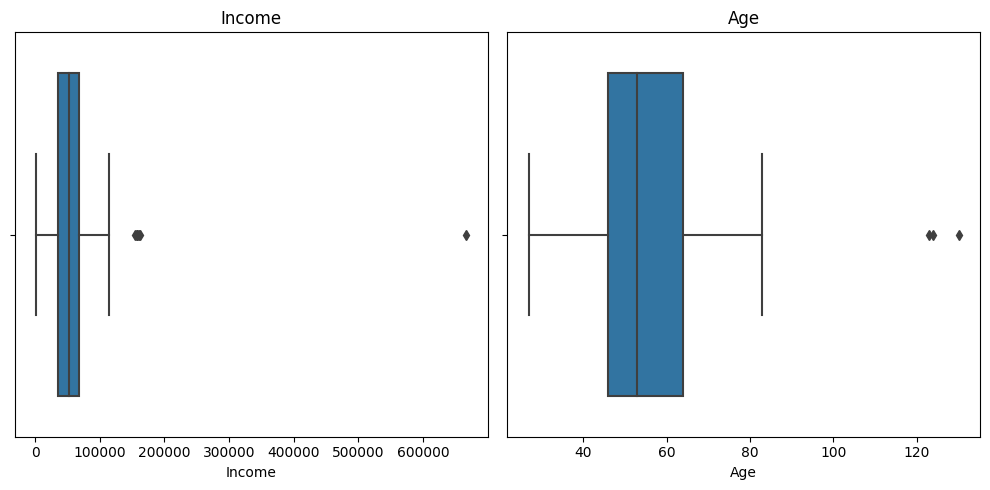

In [25]:
# Plot the distribution of a column to visualize the outliers
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Income")
sns.boxplot(data = df, x = 'Income', ax=ax[0])

ax[1].set_title(f"Age")
sns.boxplot(data = df, x ='Age', ax=ax[1])

plt.tight_layout()
plt.show();

In [26]:
# Calculate the IQR for the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))

Number of outliers in the Income column: 8


In [27]:
# Remove the outliers in the Income column
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

In [28]:
# Calculate the IQR for the Age column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Age column
outliers = df[(df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Age column:", len(outliers))

Number of outliers in the Age column: 3


In [29]:
# Remove the outliers in the Age column
df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

# 📊 Visualize Customer Demographics

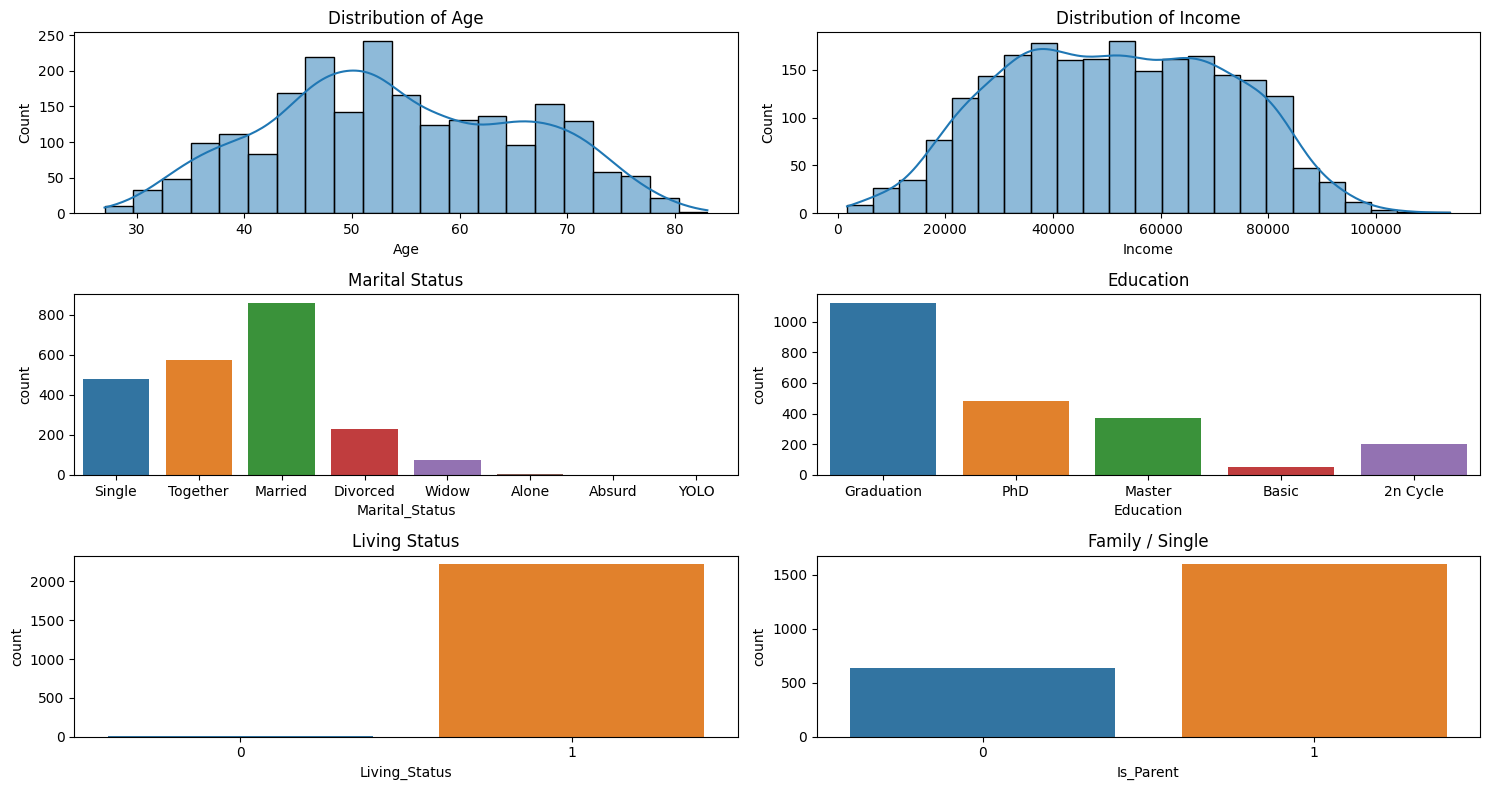

In [30]:
fig, ax = plt.subplots(3,2,figsize=(15,8))

ax[0, 0].set_title(f"Distribution of Age")
sns.histplot(data = df, x = 'Age', kde=True, ax = ax[0, 0])

ax[0, 1].set_title(f"Distribution of Income")
sns.histplot(data = df, x = 'Income', kde=True, ax=ax[0, 1]);

ax[1, 0].set_title(f"Marital Status")
sns.countplot(data = df, x = 'Marital_Status', ax=ax[1, 0])

ax[1, 1].set_title(f"Education")
sns.countplot(data = df, x = 'Education', ax=ax[1, 1])

ax[2, 0].set_title(f"Living Status")
sns.countplot(data = df, x = 'Living_Status', ax=ax[2, 0])

ax[2, 1].set_title(f"Family / Single")
sns.countplot(data = df, x = 'Is_Parent', ax=ax[2, 1])

plt.tight_layout()
plt.show();

In [31]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Education_Level', 'Living_Status', 'Total_Campaigns_Accepted',
       'Average_Spend', 'Spent', 'Is_Parent', 'total_spending',
       'avg_web_visits', 'online_purchase_ratio'],
      dtype='object')

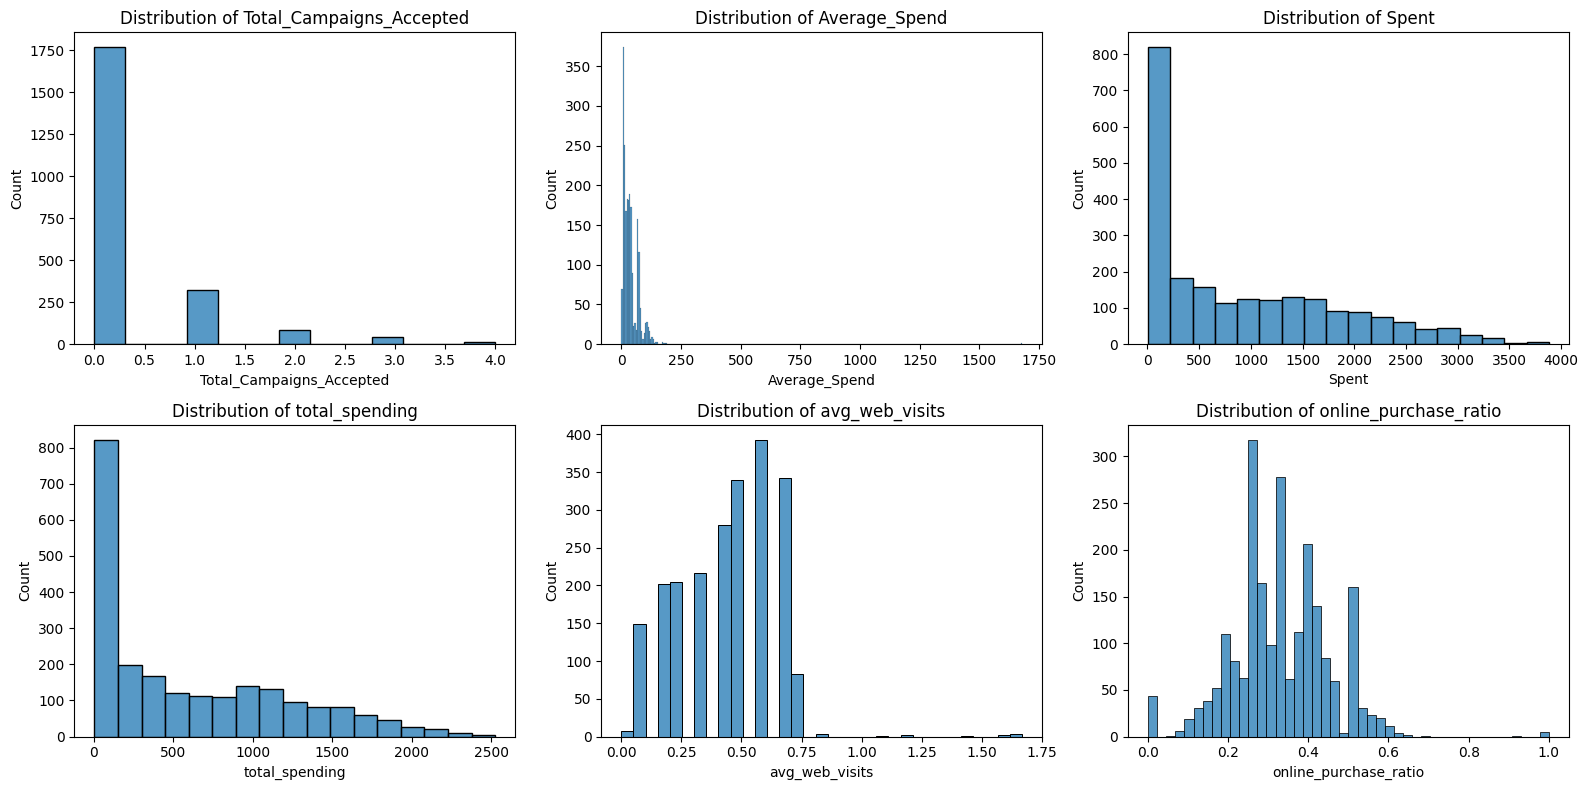

In [32]:
# check distribution of purchases, webstore visits, etc.

columns = ['Total_Campaigns_Accepted', 'Average_Spend', 'Spent',
           'total_spending', 'avg_web_visits', 'online_purchase_ratio']

fig, ax = plt.subplots(2, 3, figsize=(16, 8))

num_plots = len(columns)
num_rows = (num_plots - 1) // 3 + 1

for i, x in enumerate(columns):
    row_index = i // 3  # Row index of the subplot
    col_index = i % 3   # Column index of the subplot
    ax[row_index, col_index].set_title(f"Distribution of {x}")
    sns.histplot(data=df, x=x, ax=ax[row_index, col_index])

# Remove any empty subplots
if num_plots < num_rows * 3:
    for j in range(num_plots, num_rows * 3):
        fig.delaxes(ax[j // 3, j % 3])

plt.tight_layout()
plt.show()

## Spending Distribution by Category

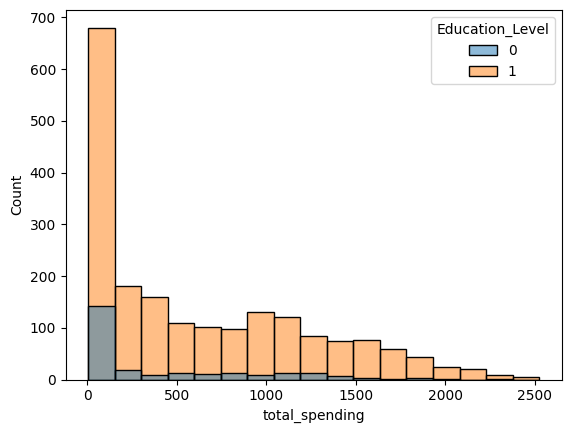

In [33]:
sns.histplot(data=df, x='total_spending', hue='Education_Level');

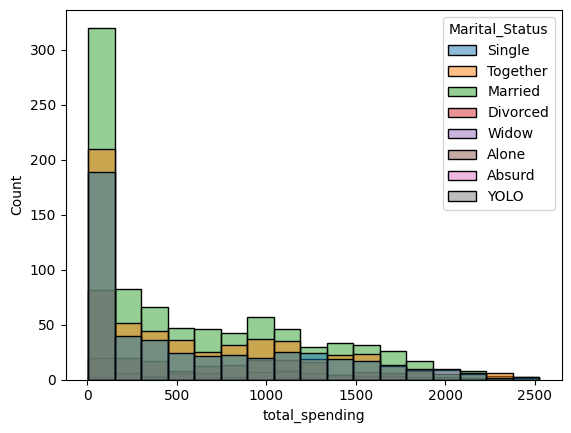

In [34]:
sns.histplot(data=df, x='total_spending', hue='Marital_Status');

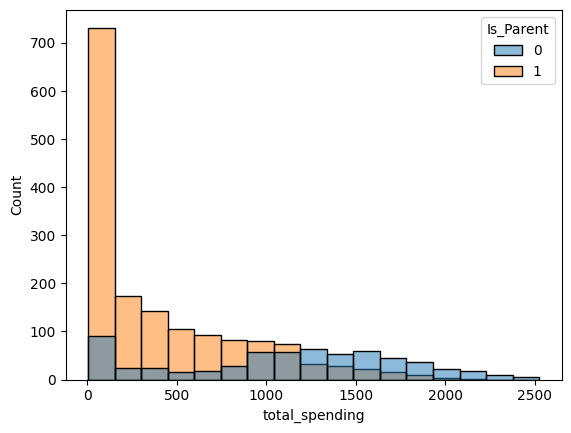

In [35]:
sns.histplot(data=df, x='total_spending', hue='Is_Parent');

## Target Distribution

In [36]:
# check what percentage of customers ignored / responded to latest campaign
df['Response'].value_counts()/df.shape[0]

0    0.850157
1    0.149843
Name: Response, dtype: float64

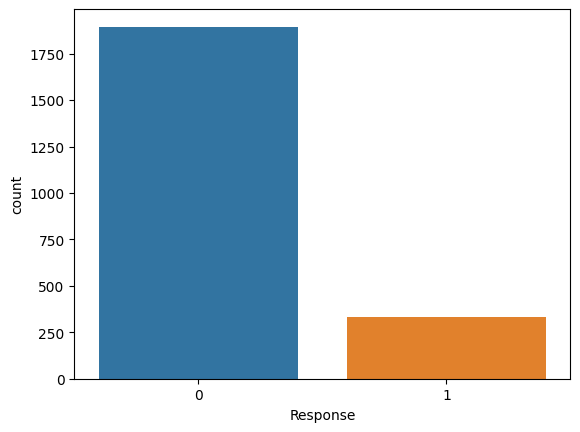

In [37]:
sns.countplot(data = df, x = 'Response');

# 🐣 Baseline Model - Most Frequent

In [38]:
len(df)

2229

In [39]:
df['Response'].value_counts()

0    1895
1     334
Name: Response, dtype: int64

In [40]:
target_pred_baseline = pd.Series([0]*len(df))
target_pred_baseline.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

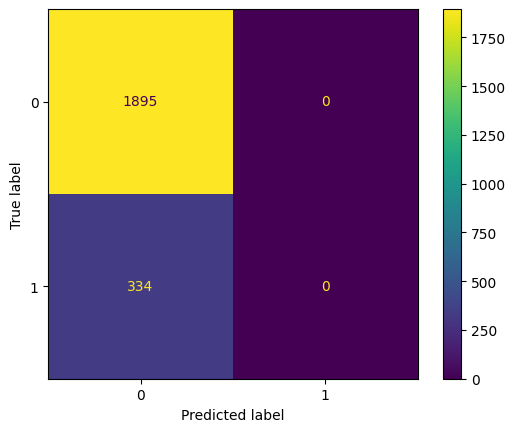

In [41]:
cm = confusion_matrix(df['Response'], target_pred_baseline, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [42]:
accuracy_score(df['Response'], target_pred_baseline)

0.8501570210856887

In [71]:
print(classification_report(df['Response'], target_pred_baseline))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1895
           1       0.00      0.00      0.00       334

    accuracy                           0.85      2229
   macro avg       0.43      0.50      0.46      2229
weighted avg       0.72      0.85      0.78      2229



/home/jccarville/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jccarville/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jccarville/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

### 💭 Comment

- The vast majority of customers did not respond to the latest campaign offer
- So by taking the most frequent response, we achieved an accuracy score of 85%
- **HOWEVER! This means we did NOT classify any of the customers who DID respond to the campaign offer.**
- Let's see if we can make a classification model that performs significantly better!

# Pipeline

## 🎯 Define features and target

In [43]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Education_Level', 'Living_Status', 'Total_Campaigns_Accepted',
       'Average_Spend', 'Spent', 'Is_Parent', 'total_spending',
       'avg_web_visits', 'online_purchase_ratio'],
      dtype='object')

In [44]:
X = df[['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Age', 'Education_Level', 'Living_Status', 'Total_Campaigns_Accepted',
       'Average_Spend', 'Spent', 'Is_Parent', 'total_spending',
       'avg_web_visits', 'online_purchase_ratio']]
y = df['Response']

In [45]:
X.shape, y.shape

((2229, 27), (2229,))

In [46]:
X.dtypes.value_counts()

int64      23
float64     4
dtype: int64

In [47]:
X.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Education_Level,Living_Status,Total_Campaigns_Accepted,Average_Spend,Spent,Is_Parent,total_spending,avg_web_visits,online_purchase_ratio
0,58138.0,0,0,663,58,635,88,546,172,88,88,3,8,10,4,7,0,66,1,1,0,73.500000,2252,0,1617,0.583333,0.363636
1,46344.0,1,1,113,38,11,1,6,2,1,6,2,1,1,2,5,0,69,1,1,0,6.750000,38,1,27,0.416667,0.250000
2,71613.0,0,0,312,26,426,49,127,111,21,42,1,8,2,10,4,0,58,1,1,0,38.800000,1202,0,776,0.333333,0.400000
3,26646.0,1,0,139,26,11,4,20,10,3,5,2,2,0,4,6,0,39,1,1,0,8.833333,64,1,53,0.500000,0.333333
4,58293.0,1,0,161,94,173,43,118,46,27,15,5,5,3,6,5,0,42,1,1,0,30.142857,595,1,422,0.416667,0.357143


## ✂️ Holdout method

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1560, 27), (669, 27), (1560,), (669,))

## 🔢 Scaling numerical features

In [84]:
num_scaler = StandardScaler()
num_scaler.fit(X_train)
X_train_scaled = pd.DataFrame(num_scaler.transform(X_train),
                              columns = num_scaler.get_feature_names_out())
X_train_scaled.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Education_Level,Living_Status,Total_Campaigns_Accepted,Average_Spend,Spent,Is_Parent,total_spending,avg_web_visits,online_purchase_ratio
0,1.146671,-0.832968,-0.923069,0.801629,-1.101775,-0.001395,1.778071,0.277749,2.036422,1.161261,0.621043,-0.682019,0.734205,0.125628,2.230629,-0.951813,-0.098533,1.456215,0.347404,0.050702,-0.440278,0.076959,0.351054,-1.544004,0.533054,-0.951813,-0.466173
1,0.667713,-0.832968,0.906648,-0.204402,-0.204336,-0.060793,-0.582687,-0.368204,-0.616605,-0.485775,-0.389948,-0.169519,-0.015867,-0.228765,0.686119,-0.542431,-0.098533,-0.428299,0.347404,0.050702,-0.440278,-0.183424,-0.239408,0.647667,-0.329374,-0.542431,-0.357544
2,1.039598,-0.832968,0.906648,-0.253717,-0.445954,0.313410,2.125972,1.118373,-0.689291,1.357922,0.561573,-0.682019,1.859313,0.125628,2.230629,-0.542431,-0.098533,1.884514,0.347404,0.050702,-0.440278,0.106760,0.644660,0.647667,0.804103,-0.542431,0.263809
3,-0.316066,1.020712,0.906648,1.018616,-0.480471,-0.847807,-0.632387,-0.664634,-0.652948,-0.657853,-0.806239,-0.682019,-1.140975,-0.937550,-0.858391,1.095097,-0.098533,-0.942257,0.347404,0.050702,-0.440278,-0.547897,-0.920877,0.647667,-0.927324,1.095097,-0.656272
4,1.354882,-0.832968,-0.923069,-1.506325,0.727620,0.135218,0.833768,1.773174,1.309565,2.611635,2.028502,-0.682019,0.359169,1.188805,0.377217,-1.361196,-0.098533,-0.342639,0.347404,0.050702,1.030458,0.732907,0.873261,-1.544004,1.249280,-1.361196,-0.423928


In [85]:
X_test_scaled = pd.DataFrame(num_scaler.transform(X_test),
                              columns = num_scaler.get_feature_names_out())
X_test_scaled.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Education_Level,Living_Status,Total_Campaigns_Accepted,Average_Spend,Spent,Is_Parent,total_spending,avg_web_visits,online_purchase_ratio
0,0.035372,-0.832968,0.906648,0.495874,-0.342403,-0.348870,-0.532986,-0.452266,-0.216834,-0.166201,-0.568359,-0.169519,-0.015867,-0.228765,0.068315,-0.133049,-0.098533,-0.085660,0.347404,0.050702,-0.440278,-0.232439,-0.439840,0.647667,-0.473933,-0.133049,0.040759
1,-1.311425,1.020712,-0.923069,1.566015,1.141823,-0.901265,-0.508136,-0.730999,-0.543919,-0.608688,-0.608005,-0.682019,-1.140975,-0.937550,-1.167293,0.685715,-0.098533,-1.027916,-2.878492,0.050702,-0.440278,-0.546271,-0.951213,0.647667,-0.943751,0.685715,0.040759
2,0.533378,-0.832968,0.906648,-1.333721,1.728610,0.170857,-0.234785,1.021037,0.764423,0.202539,0.363339,0.342981,0.359169,0.125628,-0.240587,-0.542431,-0.098533,0.599618,0.347404,0.050702,1.030458,0.682541,0.438811,0.647667,0.570837,-0.542431,0.469701
3,-0.816785,1.020712,0.906648,-1.526051,0.658587,-0.883446,-0.607537,-0.700029,-0.652948,-0.657853,-0.806239,-0.169519,-1.140975,-0.937550,-0.858391,-0.542431,-0.098533,1.370555,0.347404,0.050702,-0.440278,-0.640584,-0.954463,0.647667,-0.958535,-0.542431,-0.656272
4,-0.249477,1.020712,0.906648,-1.185776,-0.376920,-0.871566,-0.632387,-0.713302,-0.652948,-0.633270,-0.726946,-0.169519,-1.140975,-0.583157,-1.167293,-0.133049,-0.098533,1.284896,0.347404,0.050702,-0.440278,-0.616192,-0.944713,0.647667,-0.950322,-0.133049,-0.656272


# 📈 First Model

In [86]:
logreg = LogisticRegression(max_iter = 1_000, penalty = "l2")

In [87]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [88]:
logreg.score(X_test_scaled, y_test)

0.905829596412556

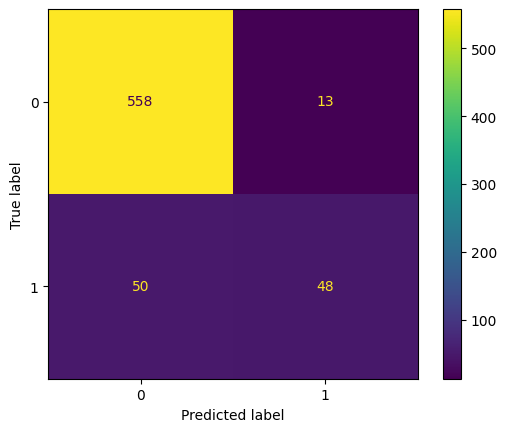

In [89]:
y_pred_logreg = logreg.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_logreg, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [90]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       571
           1       0.79      0.49      0.60        98

    accuracy                           0.91       669
   macro avg       0.85      0.73      0.78       669
weighted avg       0.90      0.91      0.90       669



### 💭 Comment
- A basic logistic regression model improved accuracy by 5%
- It correctly identified roughly **HALF** of customers who responded to the campaign.
- Almost **80%** of the customers identified as RESPONDENTS were correct.

# 🪜 Next Steps
1. Scenario A: High potential value from capturing all potential customers.
- Maximize true positives (increase recall)
2. Scenario B: Limited resources or costs associated with targeting customers.
- Reduce false positives (increase precision)

## 👁️ A. Increase Recall

In [65]:
targeted_recall = 0.95

In [62]:
# Predict probabilities
y_pred_probas_0, y_pred_probas_1 = cross_val_predict(LogisticRegression(max_iter = 1_000),
                                                     X_train_scaled, y_train,
                                                     method = "predict_proba").T

# Generate precision and thresholds (and recalls) using probabilities for class 1
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_probas_1)

# Populate dataframe with precision and threshold
df_recall = pd.DataFrame({"recall" : recall[1:],
                          "threshold" : thresholds})

# New Threshold
new_threshold = df_recall[df_recall.recall > targeted_recall]["threshold"].max()
new_threshold

In [67]:
# New predictions
y_pred_logreg_probas = logreg.predict_proba(X_test_scaled)

y_new_pred = y_pred_logreg_probas[:,1] > new_threshold

(669, 2)

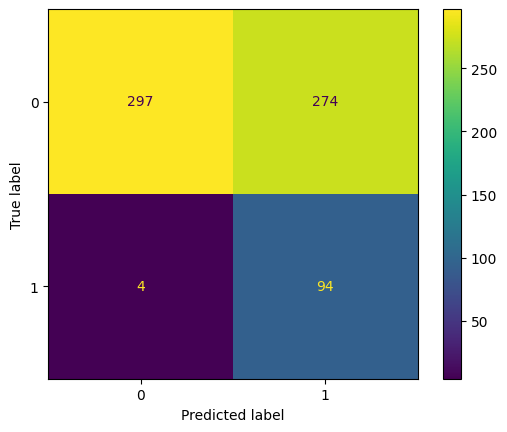

In [69]:
cm = confusion_matrix(y_test, y_new_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [70]:
print(classification_report(y_test, y_new_pred))

              precision    recall  f1-score   support

           0       0.99      0.52      0.68       571
           1       0.26      0.96      0.40        98

    accuracy                           0.58       669
   macro avg       0.62      0.74      0.54       669
weighted avg       0.88      0.58      0.64       669



### 💭 Comment
- Now we captured **96%** of all customers who would respond to our campaign, but at a HIGH COST!
- Let's try to improve the model instead. How can we do this?
1. Feature selection - VIF, feature permutation
2. Class balancing - SMOTE
3. Try more advanced models

## 